IMPORTING NECESSARY LIBRARIES

In [270]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

LOADING DATASET

In [122]:
file_path = "C:/Users/User/Downloads/Churn_Modelling.csv"
train_data = pd.read_csv(file_path)

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DROPPING UNECESSARY COLUMNS

In [123]:
train_data.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


CHECKING FOR MISSING AND DUPLICATE VALUES

In [124]:
train_data.isnull().sum()
train_data.duplicated().sum()

np.int64(0)

ENCODING CATEGORICAL FEATURES

In [125]:
train_data = pd.get_dummies(train_data, columns=['Geography', 'Gender'], drop_first=True)

train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [146]:
train_data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = train_data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


SPLITTING THE DATASET

In [147]:
X = train_data.drop(columns=['Exited'])
y = train_data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

FEATURE SCALING

In [148]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.058568,1.715086,0.684723,-1.226059,-0.910256,0.641042,-1.030206,1.042084,-0.578313,-0.577735,0.907507
1,0.913626,-0.659935,-0.696202,0.413288,-0.910256,0.641042,-1.030206,-0.623556,1.729169,-0.577735,0.907507
2,1.079274,-0.184931,-1.731895,0.601687,0.808830,0.641042,0.970680,0.308128,1.729169,-0.577735,-1.101919
3,-0.929207,-0.184931,-0.005739,-1.226059,0.808830,0.641042,-1.030206,-0.290199,-0.578313,-0.577735,0.907507
4,0.427035,0.955079,0.339492,0.548318,0.808830,-1.559960,0.970680,0.135042,1.729169,-0.577735,0.907507


GRADIENT BOOST MODEL

In [267]:

gb_model = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.06, max_depth =3, random_state = 42)
gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.30
y_pred = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8505


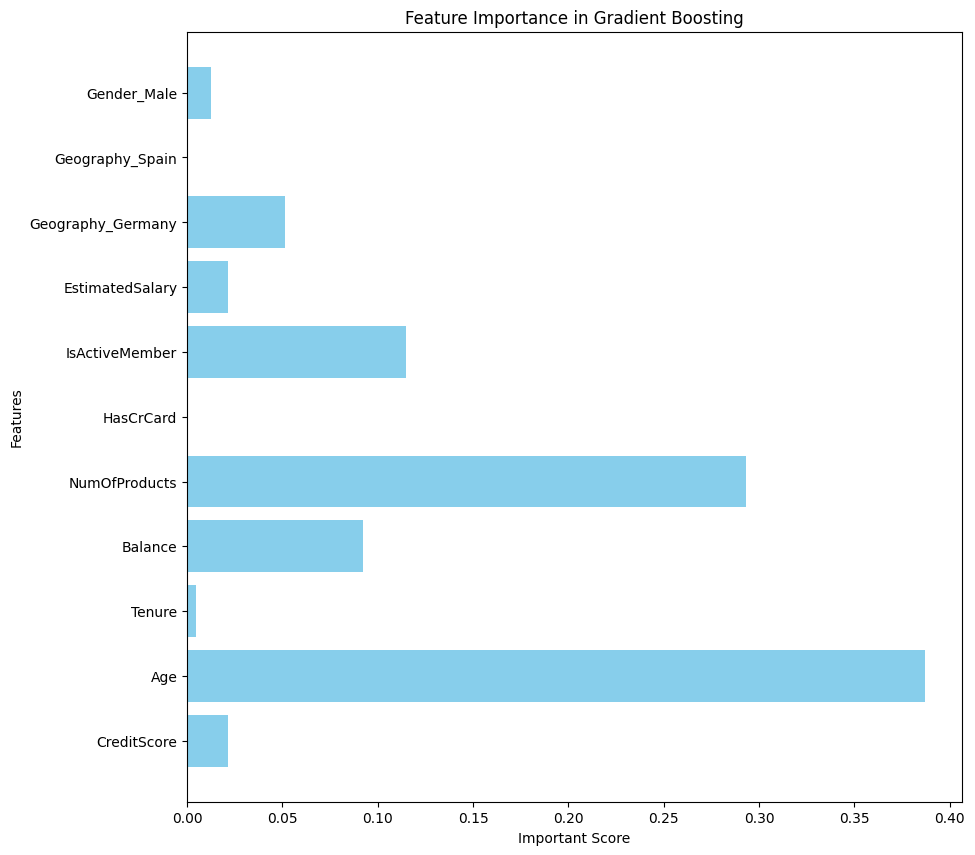

In [268]:
feature_importance = gb_model.feature_importances_
feature_names = X_train_scaled.columns

if len(feature_names) != len(feature_importance):
    print(f"Mismatch detected: {len(feature_names)} features vs. {len(feature_importance)} importance socres")
                                                 
plt.figure(figsize=(10,10))
plt.barh(feature_names, feature_importance, color = 'skyblue')
plt.xlabel("Important Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [269]:
report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1593
           1       0.63      0.65      0.64       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



SAVING MODEL FOR REUSE

In [271]:
joblib.dump(gb_model, "customer_churn_model.pkl")
joblib.dump(scaler, "customer_churn_scaler.pkl")
print("Customer Churn Model and Scaler saved sucessfully.")

Customer Churn Model and Scaler saved sucessfully.
